# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [3]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from scipy import optimize
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In this question we are asked to find the optimal coverage amount of the agent.
We do this following this approach:
- define the utility function of the agent
- maximize the utility function with the given parametrization using loops
    - problem: q* depends on x, so use for loop within for loop

best with loop is           -1.11111111 at q = 0.50000000
want to insure 100% of loss as risk averse
best with loop for x = 0.01000000 is -1.00200401 at q = 0.01000000
best with loop for x = 0.01898990 is -1.00381246 at q = 0.01898990
best with loop for x = 0.02797980 is -1.00562745 at q = 0.02797980
best with loop for x = 0.03696970 is -1.00744902 at q = 0.03696970
best with loop for x = 0.04595960 is -1.00927719 at q = 0.04595960
best with loop for x = 0.05494949 is -1.01111202 at q = 0.05494949
best with loop for x = 0.06393939 is -1.01295353 at q = 0.06393939
best with loop for x = 0.07292929 is -1.01480175 at q = 0.07292929
best with loop for x = 0.08191919 is -1.01665674 at q = 0.08191919
best with loop for x = 0.09090909 is -1.01851852 at q = 0.09090909
best with loop for x = 0.09989899 is -1.02038713 at q = 0.09989899
best with loop for x = 0.10888889 is -1.02226261 at q = 0.10888889
best with loop for x = 0.11787879 is -1.02414499 at q = 0.11787879
best with loop for x = 0.126

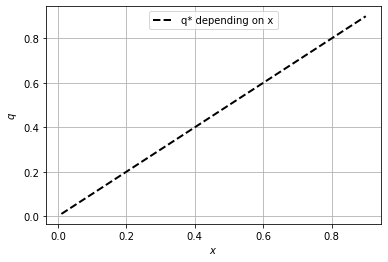

In [2]:
# solving the model, can at a later stage be moved to .py file
def u(z, v = -2):
    return z**(1+v)/(1+v)

def u_unins(x, y = 1, p = 0.2):
    return p*u(y-x) + (1-p)*u(y)
 
    
# try to do it with fixed x=0.5
def u_ins(q, x=0.5, y = 1, p = 0.2, v = -2):
    return p*u(y-x+q-p*q) + (1-p)*u(y-p*q)


# first try to optimize for given level of x = 0.5
x=0.5
# b. solution using a loop
N = 100
q_vec = np.linspace(0.01,x,N)
u_vec = np.empty(N)

u_best = -999 # initial maximum
q_best = np.nan # not-a-number


for i,q in enumerate(q_vec):
    u_now = u_vec[i] = u_ins(q)
    if u_now>u_best:
        q_best=q
        u_best=u_ins(q)
        
print(f'best with loop is           {u_best:.8f} at q = {q_best:.8f}')
print("want to insure 100% of loss as risk averse")


# now optimize for different levels of x
q_save = np.empty(100)
x = np.linspace(0.01,0.9,100)
N = 100
for ind, x_i in enumerate(x):
    q_vec = np.linspace(0.01,x_i,N)
    u_vec = np.empty(N)
    u_best = -999 # initial maximum
    q_best = np.nan # not-a-number
    for i,q in enumerate(q_vec):
        u_now = u_vec[i] = u_ins(q, x=x_i)
        if u_now>u_best:
            q_best=q
            u_best=u_ins(q, x=x_i)
    print(f'best with loop for x = {x_i:.8f} is {u_best:.8f} at q = {q_best:.8f}')
    q_save[ind]=q_best

    
    

# figure
import matplotlib.pyplot as plt
fig = plt.figure() # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)

ax.plot(x,q_save,ls='--',lw=2,color='black',label='q* depending on x')

ax.set_xlabel('$x$')
ax.set_ylabel('$q$')
ax.grid(True)
ax.legend(loc='upper center');

# Question 2

Explain your code and procedure

-1.3
0.18105550493427564
now we analyze multiple levels of q
-1.3
-1.3
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


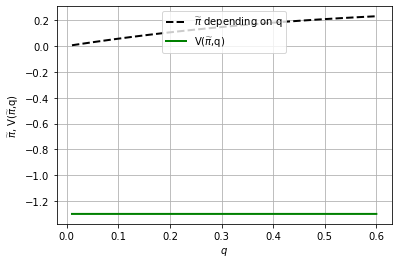

In [19]:
# solving the model, can at a later stage be moved to .py file

# define utility function
def u(z, v = -2):
    return z**(1+v)/(1+v)

# define the utility level of uninsured people
def u_unins(x=0.6, y = 1, p = 0.2):
    return p*u(y-x) + (1-p)*u(y)
 
    
#### try to do it with fixed x=0.6

# define the utility level for insured people
def u_ins(q, pi, x=0.6, y = 1, p = 0.2):
    return p*u(y-x+q-pi) + (1-p)*u(y-pi)

# print the utility level of uninsured people as a reference
print(u_unins())

# first solve for fixed q = 0.4 and then later loop over possible values of q
# define objective function: minimize absolute value of insured utility and uninsured utility (should equal 0 --> we minimize)
def choose(pi):
    return np.absolute(u_ins(pi=pi, q=0.4)-u_unins())

# b. call solver
sol = optimize.minimize_scalar(
    choose,
    method='bounded',
    bounds=(0,0.6)) #we do not allow to pay more than you are insured for maximally

pi = sol.x
print(pi)


#### now we analyze the problem for different levels of q
print("now we analyze multiple levels of q")

# now do for all q between 0.01 and 0.6
pi_save = np.empty(100)
V_save = np.empty(100)
q_vec = np.linspace(0.01, 0.6, 100)
for i, q in enumerate(q_vec):
    #define what we want to minimize
    def choose(pi):
        return np.absolute(u_ins(pi=pi, q=q)-u_unins())
    #call solver
    sol = optimize.minimize_scalar(
        choose,
        method='bounded',
        bounds=(0,0.6)) #we do not allow to pay more than you maximally are insured for (=max claim)
    pi=sol.x
    pi_save[i]=pi
    V_save[i]=u_ins(pi=pi, q=q)


    
# figure ---> how should we plot the V? It is negative in the utility function...
fig = plt.figure() # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)
ax.plot(q_vec,pi_save,ls='--',lw=2,color='black',label='$\widetilde{\pi}$ depending on q')
ax.plot(q_vec,V_save,ls='-',lw=2,color='green',label='V($\widetilde{\pi}$,q)')
ax.set_xlabel('$q$')
ax.set_ylabel('$ \widetilde{\pi} $, V($\widetilde{\pi}$,q)')
ax.grid(True)
ax.legend(loc='upper center')



# testing
print(u_unins())   # print uninsured utility level
test=1   # select which observation of result vectors to check
print(round(u_ins(q=q_vec[test], pi=pi_save[test]),3))  # must always by around -1.3

for  i, pi in enumerate(pi_save):
    if u_unins()-round(u_ins(q=q_vec[i], pi=pi),1) == 0:
        print(".")
    else:
        print("ERROR, CHECK AGAIN")





# Question 3

Explain your code and procedure

In [3]:
# code example to add

ADD CONCISE CONLUSION.